In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()

rc('font',family=font_name) # 한글 폰트

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF 분석
import random

In [47]:
a = pd.read_csv('./영양성분.csv', encoding='utf-8')[1:-1]
b = pd.read_csv('./칼로리.csv', encoding='utf-8')[1:-1]

In [48]:
a['카테고리: 모든 카테고리'] = a['카테고리: 모든 카테고리'].astype('int64')
a['datetime'] = pd.to_datetime(a.index)
a.reset_index(drop=True, inplace=True)

In [49]:
b['카테고리: 모든 카테고리'] = b['카테고리: 모든 카테고리'].astype('int64')
b['datetime'] = pd.to_datetime(b.index)
b.reset_index(drop=True, inplace=True)

In [50]:
X = sm.add_constant(a.index) # x축 설정
model = sm.OLS(a['카테고리: 모든 카테고리'],X) # OLS 모델 분석 (종속변수, 독립변수)
result = model.fit() # 회귀모형 계산

print(result.summary()) # 결과 출력

                            OLS Regression Results                            
Dep. Variable:          카테고리: 모든 카테고리   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     662.7
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           7.15e-40
Time:                        17:13:18   Log-Likelihood:                -272.66
No. Observations:                  80   AIC:                             549.3
Df Residuals:                      78   BIC:                             554.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3278      1.640      6.297      0.0

In [51]:
X2 = sm.add_constant(b.index) # x축 설정
model = sm.OLS(b['카테고리: 모든 카테고리'],X2) # OLS 모델 분석 (종속변수, 독립변수)
result = model.fit() # 회귀모형 계산

print(result.summary()) # 결과 출력

                            OLS Regression Results                            
Dep. Variable:          카테고리: 모든 카테고리   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     342.0
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           3.03e-30
Time:                        17:13:18   Log-Likelihood:                -276.37
No. Observations:                  80   AIC:                             556.7
Df Residuals:                      78   BIC:                             561.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9083      1.718     13.335      0.0

In [61]:
x1 = range(0,80)
y1 = [0.9227 * n + 10.3278 for n in x1]
y2 = [0.6944 * n + 22.9083 for n in x1]

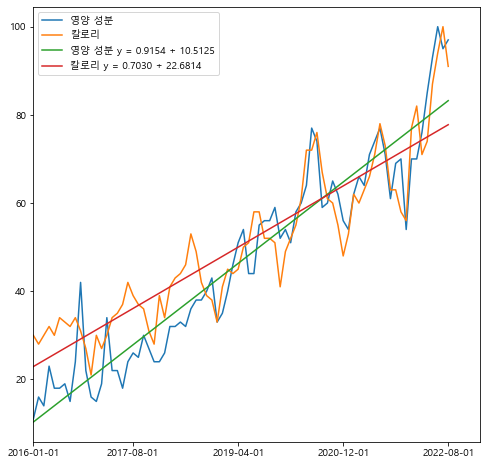

In [95]:
asd=[0,19,39,59,79]

plt.figure(figsize=(8,8))
plt.plot(a.index,a['카테고리: 모든 카테고리'], label='영양 성분')
plt.plot(b.index,b['카테고리: 모든 카테고리'], label='칼로리')
plt.plot(x1,y1, label='영양 성분 y = 0.9154 + 10.5125')
plt.plot(x1,y2, label='칼로리 y = 0.7030 + 22.6814')
plt.xticks(asd,a['datetime'].dt.date[asd])
plt.xlim(0,85)
plt.legend()
plt.show()

In [63]:
data = {'1' : a['카테고리: 모든 카테고리'],
        '2' : b['카테고리: 모든 카테고리']}
c = pd.DataFrame(data)


In [55]:
c.corr()

,1,2
1,1.000000,0.941081
2,0.941081,1.000000


<AxesSubplot:xlabel='datetime', ylabel='카테고리: 모든 카테고리'>

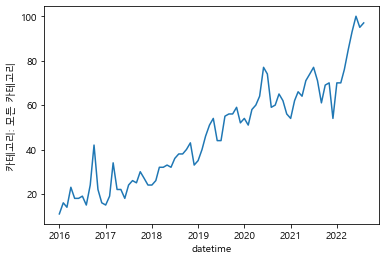

In [56]:
sns.lineplot(data=a, x='datetime', y='카테고리: 모든 카테고리')

In [93]:
a['datetime'].dt.date

0     2016-01-01
1     2016-02-01
2     2016-03-01
3     2016-04-01
4     2016-05-01
         ...    
75    2022-04-01
76    2022-05-01
77    2022-06-01
78    2022-07-01
79    2022-08-01
Name: datetime, Length: 80, dtype: object